# Project - Featurization and Model Tuning

### Submitted by - Abhik Kar 
#### Dated - 06-Jun-2020

#### Domain - Cement manufacturing
* The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.
* The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).
* Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

##### Problem Statement
* The purpose is to modeling of strength of high performance concrete using Machine Learning

##### Solution
* Apply EDA - Univariate , Bi-variate and Multi variate Analysis
* Address outliars and perform necessary imputation
* Feature Engineering 
* Dimensionality reduction technique 
* Train a model
* Model fitment and comparision
* Model Tuning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from os import system
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file into a dataframe 'concrete'
concrete_raw=pd.read_csv("concrete.csv")

In [3]:
concrete_raw.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


#### Column description and each attribute in the DataFrame

* Cement : measured in kg in a m3 mixture
* Blast : measured in kg in a m3 mixture
* Fly ash : measured in kg in a m3 mixture
* Water : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Aggregate : measured in kg in a m3 mixture
* Age : day (1~365)
* Concrete compressive strength measured in MPa

## Deliverable - 1 ::   Exploratory Data Analysis

In [4]:
print(concrete_raw.shape)

(1030, 9)


In [5]:
concrete_raw.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [6]:
concrete_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_raw.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
concrete_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Missing Value Analysis

In [9]:
concrete_raw.isnull().values.any()

False

In [10]:
concrete_raw.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

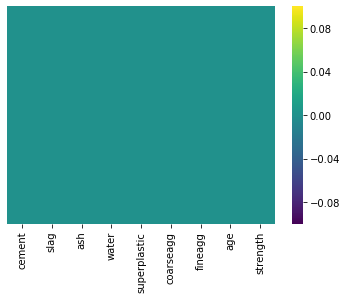

In [11]:
sns.heatmap(concrete_raw.isnull(), yticklabels=False, cmap="viridis")

##### Observation:

* No Missing value or garbage value present in the data

## 1(a) Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E300610508>,
      dtype=object)

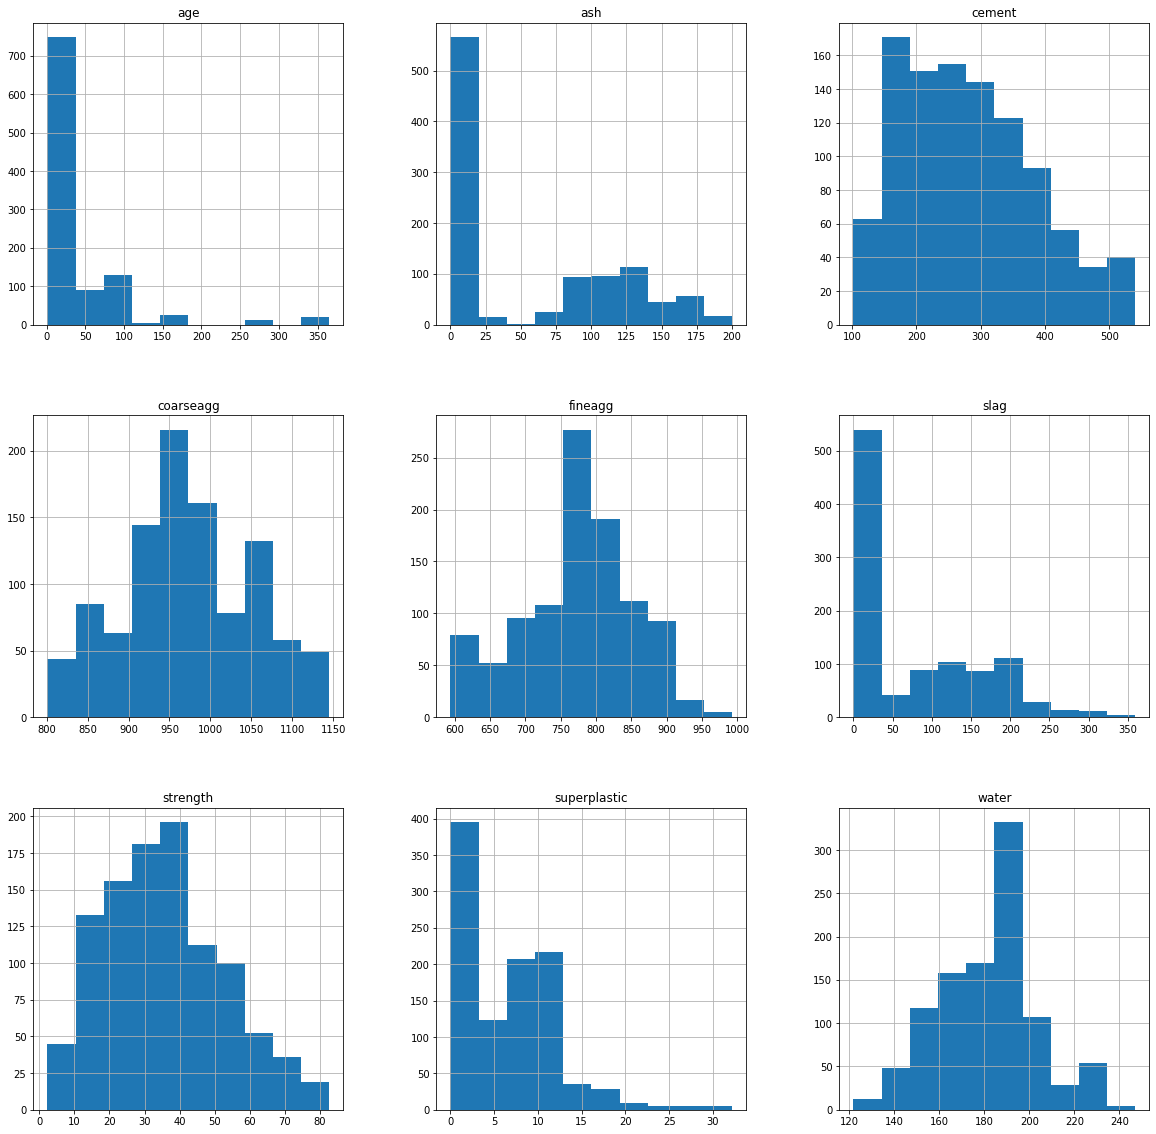

In [12]:
concrete_raw.hist(figsize=(20,20))

##### Observation:
* There are quite a few attributes with skewed distribution and long tail. Hence possible presence of outliars.

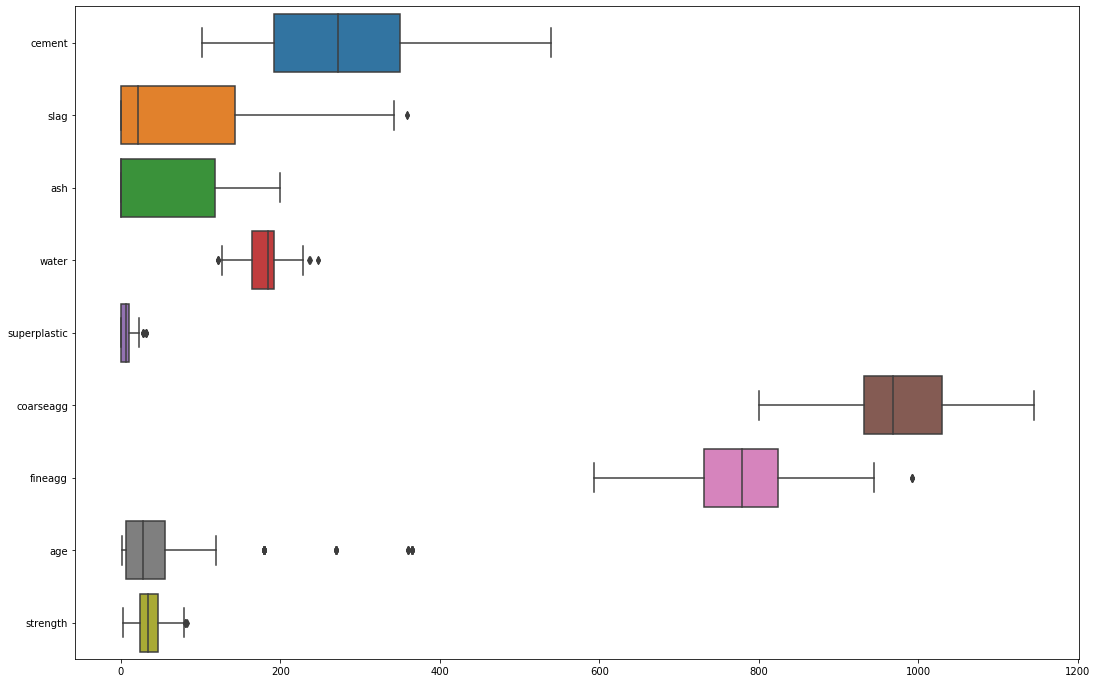

In [13]:
fig = plt.figure(figsize = (18, 12))
ax = sns.boxplot(data = concrete_raw.iloc[:, 0:18], orient = 'h')

##### Observation:
* water, superplastic, age, fineagg and slag has outliar presence

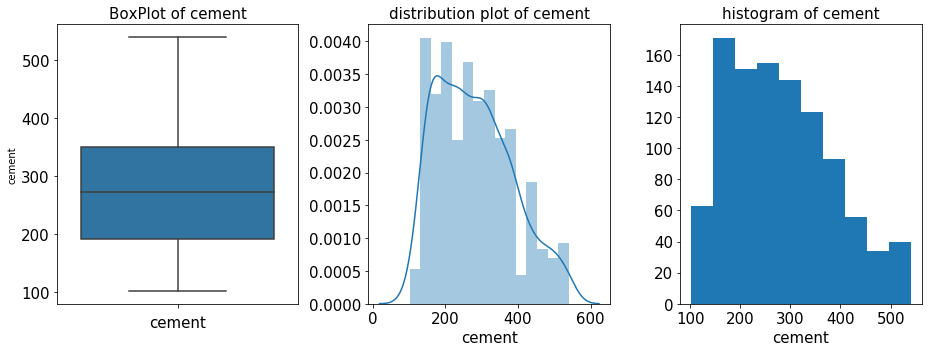

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('cement', fontsize=15)
ax1.set_title('BoxPlot of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['cement'],ax=ax2)
ax2.set_xlabel('cement', fontsize=15)
ax2.set_title('distribution plot of cement', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['cement'])
ax3.set_xlabel('cement', fontsize=15)
ax3.set_title('histogram of cement', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

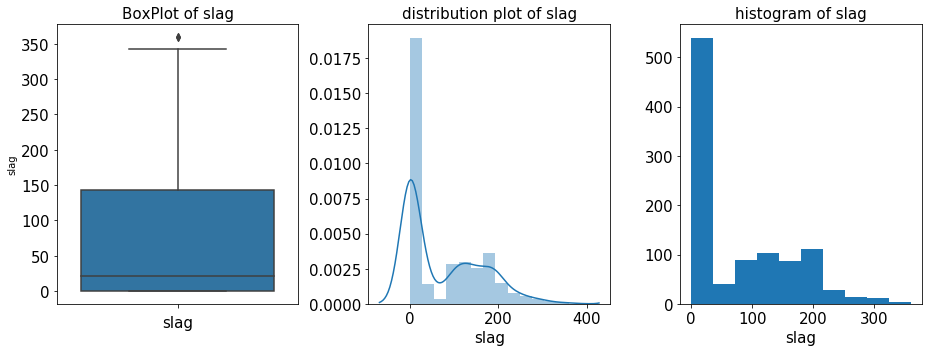

In [15]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('slag', fontsize=15)
ax1.set_title('BoxPlot of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['slag'],ax=ax2)
ax2.set_xlabel('slag', fontsize=15)
ax2.set_title('distribution plot of slag', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['slag'])
ax3.set_xlabel('slag', fontsize=15)
ax3.set_title('histogram of slag', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

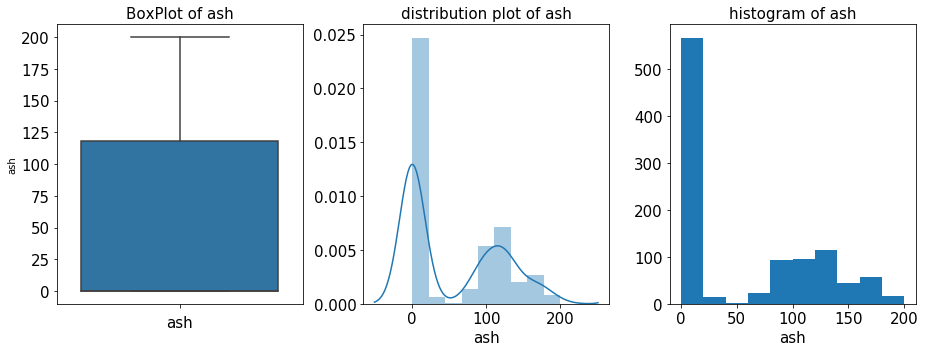

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('ash', fontsize=15)
ax1.set_title('BoxPlot of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['ash'],ax=ax2)
ax2.set_xlabel('ash', fontsize=15)
ax2.set_title('distribution plot of ash', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['ash'])
ax3.set_xlabel('ash', fontsize=15)
ax3.set_title('histogram of ash', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

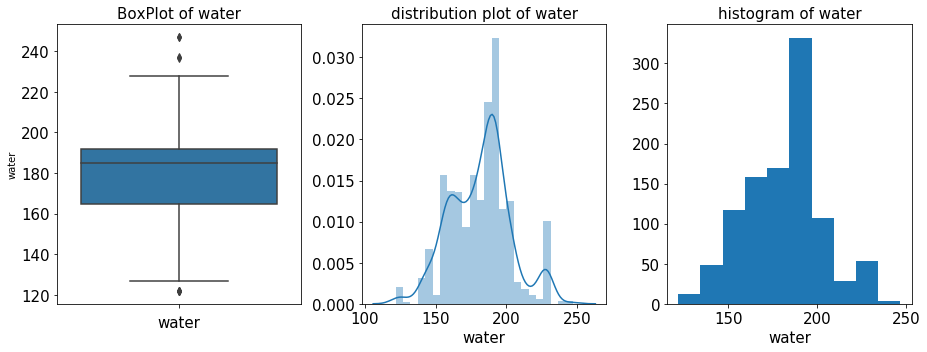

In [17]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('water', fontsize=15)
ax1.set_title('BoxPlot of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['water'],ax=ax2)
ax2.set_xlabel('water', fontsize=15)
ax2.set_title('distribution plot of water', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['water'])
ax3.set_xlabel('water', fontsize=15)
ax3.set_title('histogram of water', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

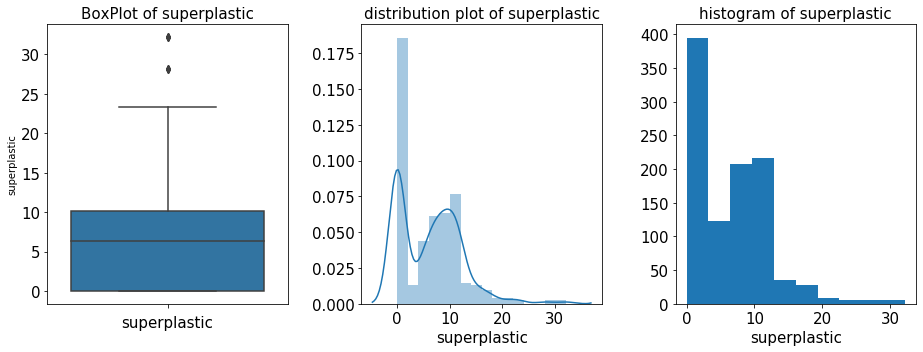

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('superplastic', fontsize=15)
ax1.set_title('BoxPlot of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['superplastic'],ax=ax2)
ax2.set_xlabel('superplastic', fontsize=15)
ax2.set_title('distribution plot of superplastic', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['superplastic'])
ax3.set_xlabel('superplastic', fontsize=15)
ax3.set_title('histogram of superplastic', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

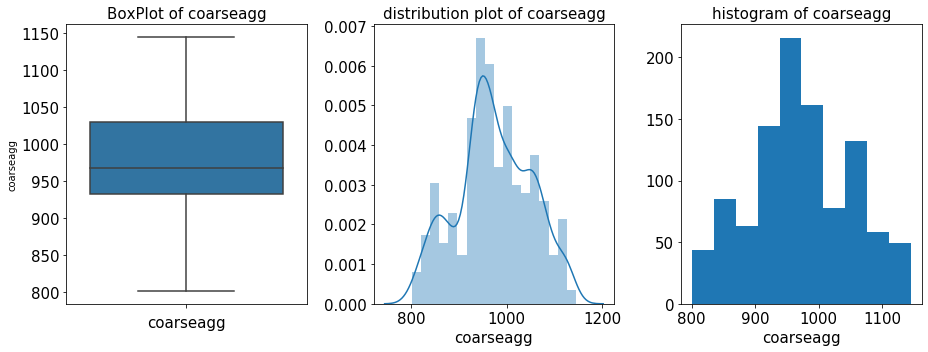

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('coarseagg', fontsize=15)
ax1.set_title('BoxPlot of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['coarseagg'],ax=ax2)
ax2.set_xlabel('coarseagg', fontsize=15)
ax2.set_title('distribution plot of coarseagg', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['coarseagg'])
ax3.set_xlabel('coarseagg', fontsize=15)
ax3.set_title('histogram of coarseagg', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

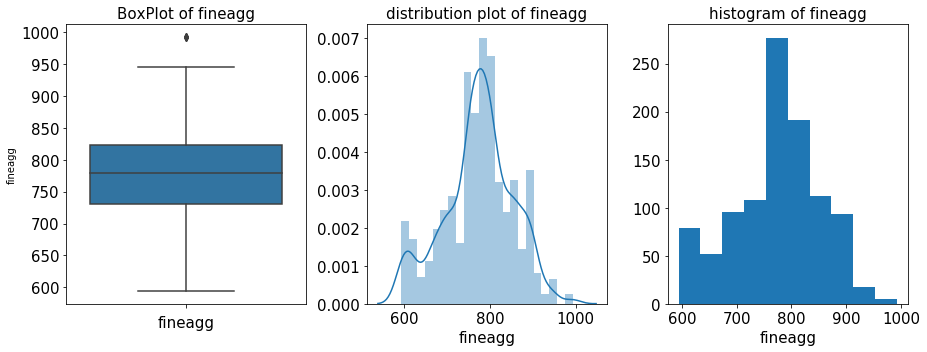

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('fineagg', fontsize=15)
ax1.set_title('BoxPlot of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['fineagg'],ax=ax2)
ax2.set_xlabel('fineagg', fontsize=15)
ax2.set_title('distribution plot of fineagg', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['fineagg'])
ax3.set_xlabel('fineagg', fontsize=15)
ax3.set_title('histogram of fineagg', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

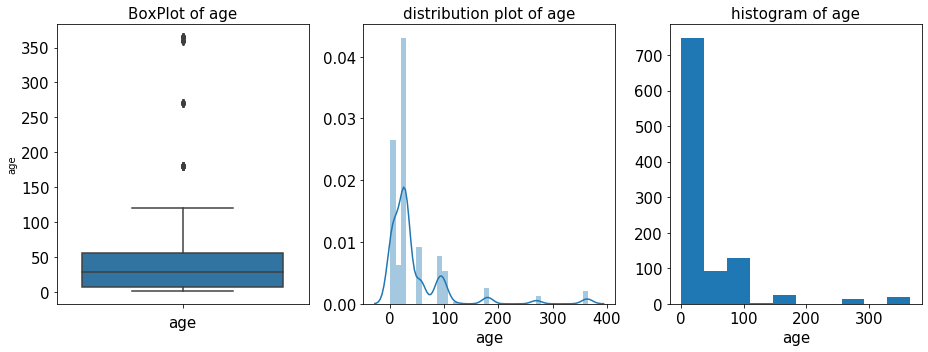

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('age', fontsize=15)
ax1.set_title('BoxPlot of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_title('distribution plot of age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.set_title('histogram of age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

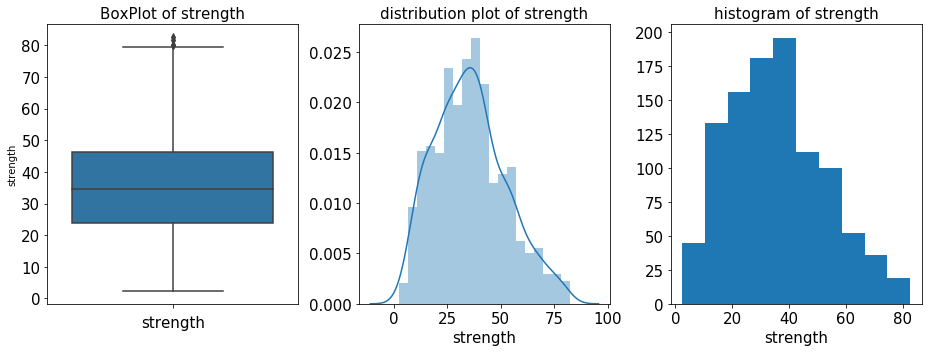

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='strength',data=concrete_raw,orient='v',ax=ax1)
ax1.set_xlabel('strength', fontsize=15)
ax1.set_title('BoxPlot of strength', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_raw['strength'],ax=ax2)
ax2.set_xlabel('strength', fontsize=15)
ax2.set_title('distribution plot of strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_raw['strength'])
ax3.set_xlabel('strength', fontsize=15)
ax3.set_title('histogram of strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## 2(c) Outlier Treatment

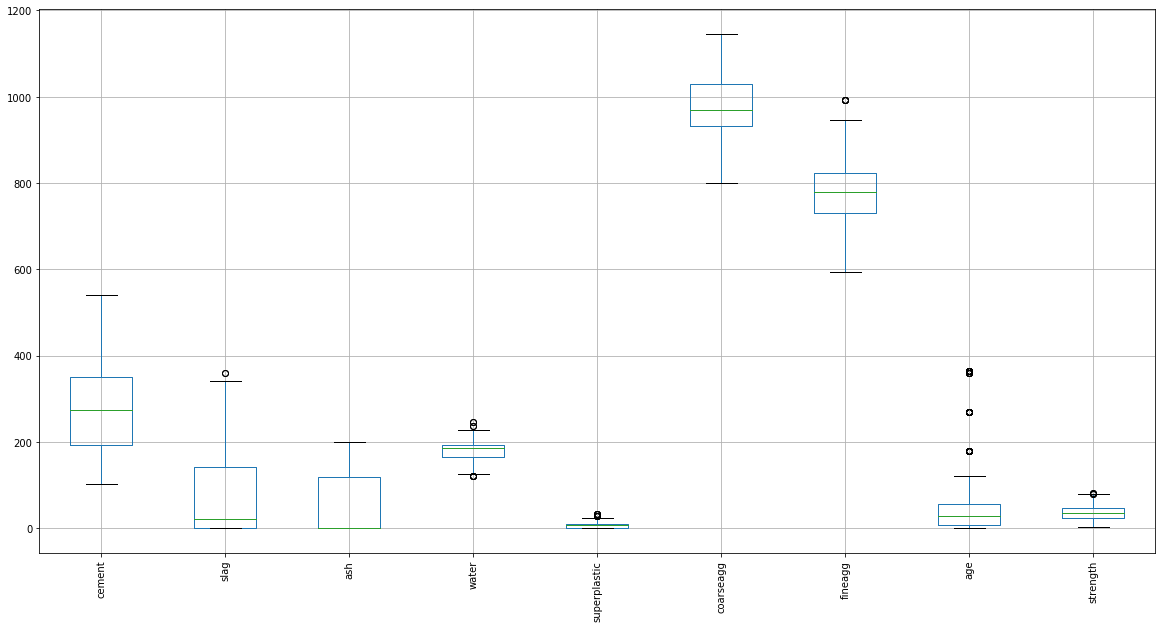

In [23]:
# Plot the central tendency of the dataset using box plots
_, bp = concrete_raw.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [24]:

#lets see the out liers for each attribute
for idx, col in enumerate(concrete_raw.columns[:-1]):
    print(col, '--', len(fliers[idx]))

cement -- 0
slag -- 2
ash -- 0
water -- 9
superplastic -- 10
coarseagg -- 0
fineagg -- 5
age -- 59


In [25]:
# Treat the outlier data points
for idx, col in enumerate(concrete_raw.columns[:-1]):
    q1 = concrete_raw[col].quantile(0.25)
    q3 = concrete_raw[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)

    concrete_raw.loc[(concrete_raw[col] < low), col] = caps[idx * 2][0]
    concrete_raw.loc[(concrete_raw[col] > high), col] = caps[idx * 2 + 1][0]

### Validate Post Outlier Treatment

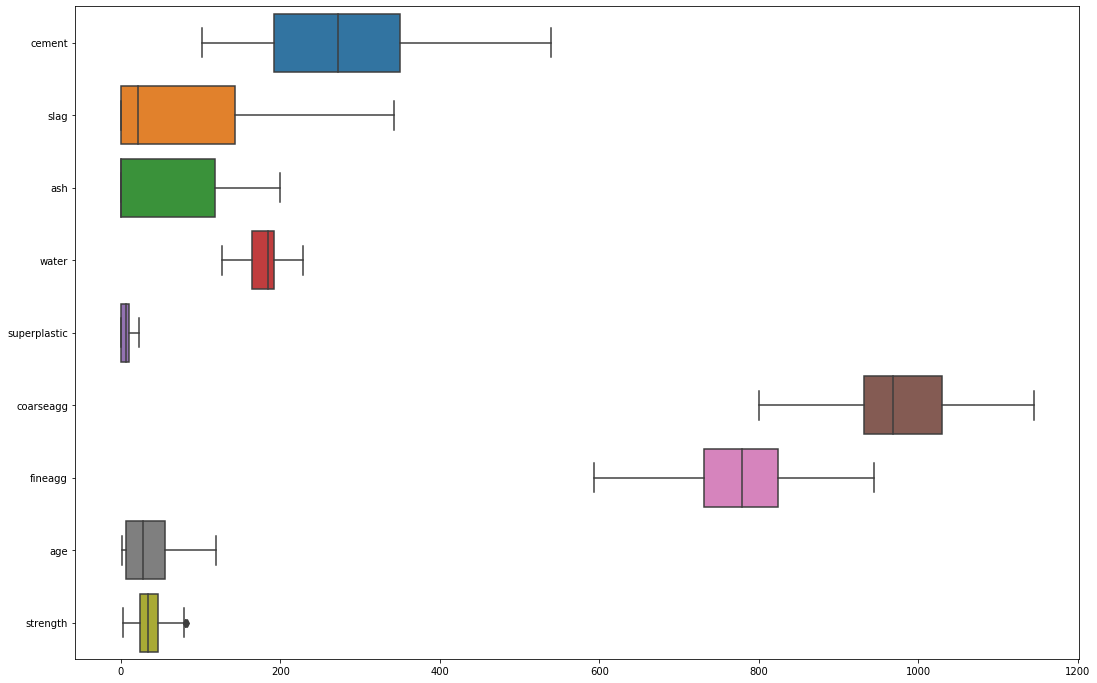

In [26]:
fig = plt.figure(figsize = (18, 12))
ax = sns.boxplot(data = concrete_raw.iloc[:, 0:18], orient = 'h')

##### Observation:
* Post outliar treatment none of the independent attributes have any more outliar present

## 2(b) Multivariate Analysis

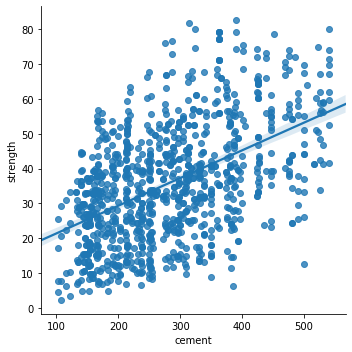

In [27]:
# cement vs target variable strength
sns.lmplot(x="cement",y="strength",data=concrete_raw)

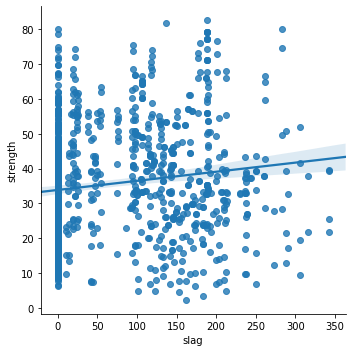

In [28]:
# slag vs target variable strength
sns.lmplot(x="slag",y="strength",data=concrete_raw)

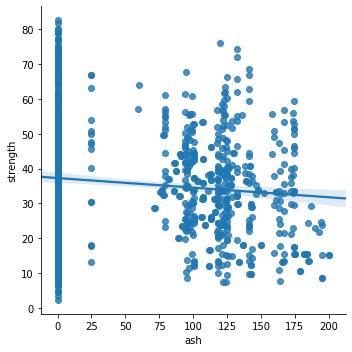

In [29]:
# ash vs target variable strength
sns.lmplot(x="ash",y="strength",data=concrete_raw)

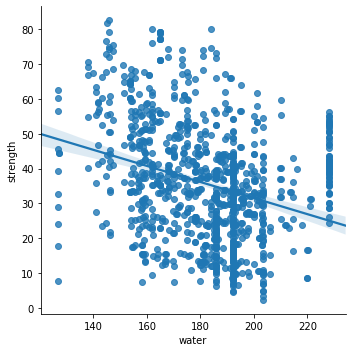

In [30]:
# water vs target variable strength
sns.lmplot(x="water",y="strength",data=concrete_raw)

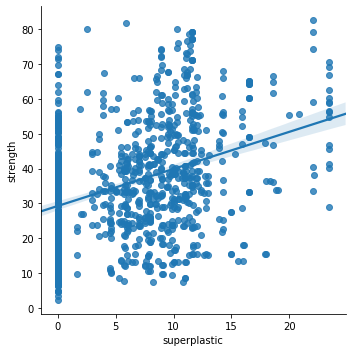

In [31]:
# superplastic vs target variable strength
sns.lmplot(x="superplastic",y="strength",data=concrete_raw)

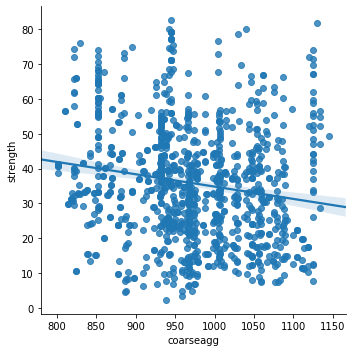

In [32]:
# coarseagg vs target variable strength
sns.lmplot(x="coarseagg",y="strength",data=concrete_raw)

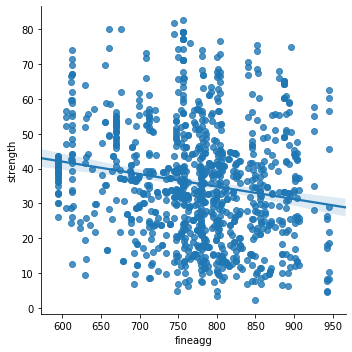

In [33]:
# fineagg vs target variable strength
sns.lmplot(x="fineagg",y="strength",data=concrete_raw)

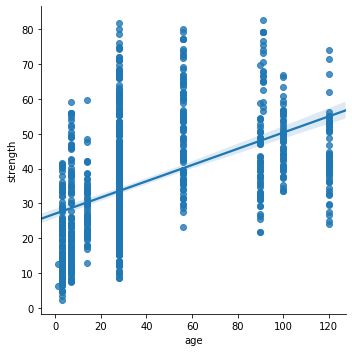

In [34]:
# age vs target variable strength
sns.lmplot(x="age",y="strength",data=concrete_raw)

##### Observations
* Slag, Ash, cousesagg & fineagg has very less influence on Strength
* Water, Superplastic and Age has strong influence on Strength

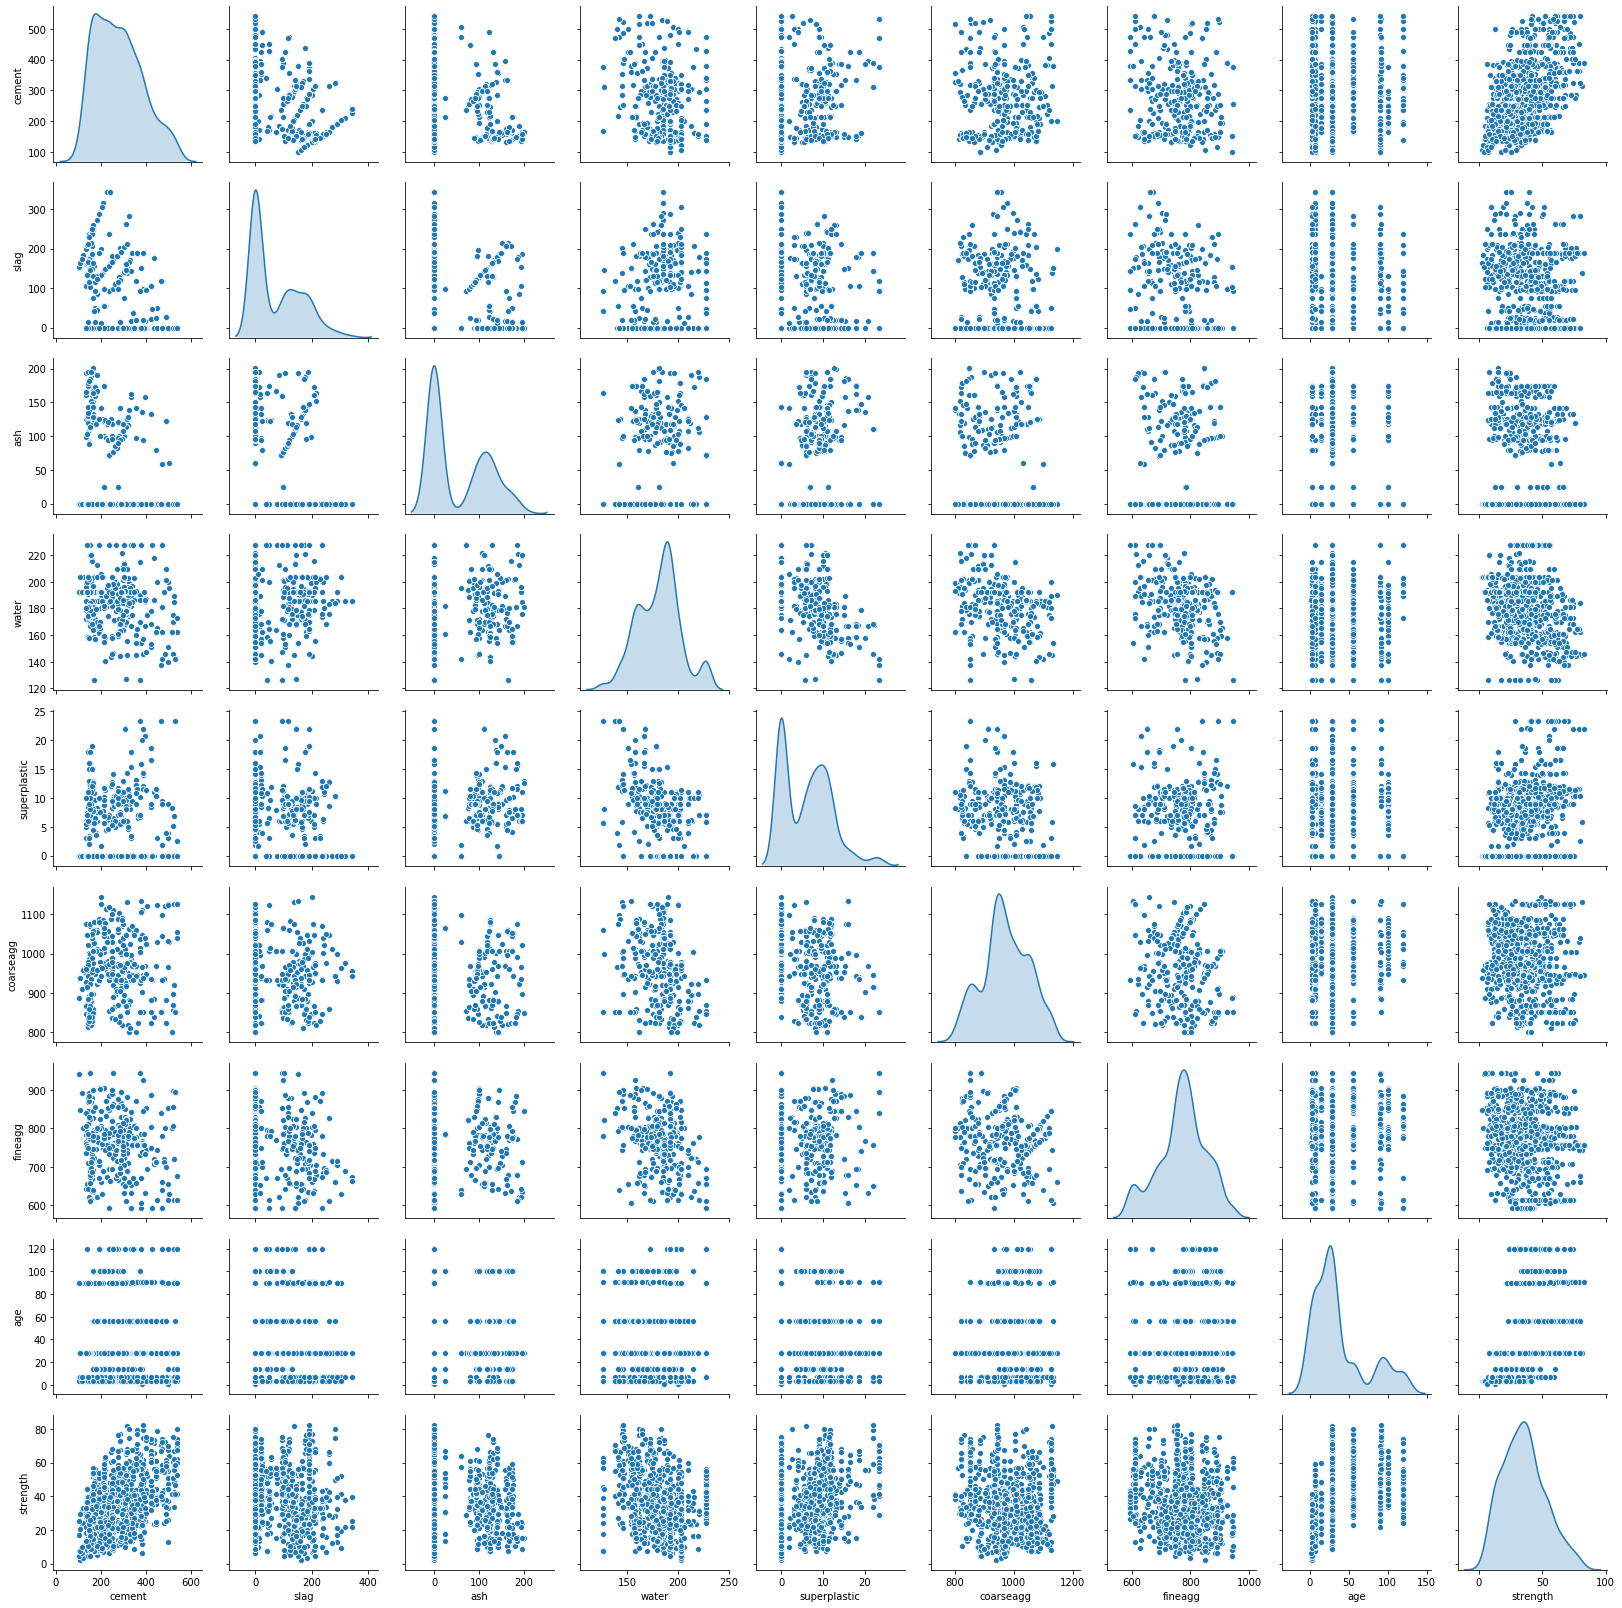

In [35]:
sns.pairplot(concrete_raw, diag_kind='kde')
plt.show()

##### Observations:
* There are multiple gausians visible in different attributes such as age, slag, ash & superplastic
* Age has a positive corelation with strength
* multiple attributes have skewed distribution age, slag & ash
* There is no significant colleration between the independent variables

In [36]:
#correlation matrix
cor=concrete_raw.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275406,-0.397467,-0.081720,0.073064,-0.109349,-0.226908,0.048754,0.497832
slag,-0.275406,1.000000,-0.323655,0.106711,0.045266,-0.284197,-0.284095,-0.051969,0.135077
ash,-0.397467,-0.323655,1.000000,-0.258938,0.402790,-0.009961,0.082130,-0.082941,-0.105755
water,-0.081720,0.106711,-0.258938,1.000000,-0.668044,-0.179034,-0.447623,0.176138,-0.292363
superplastic,0.073064,0.045266,0.402790,-0.668044,1.000000,-0.259049,0.212364,-0.112134,0.366113
coarseagg,-0.109349,-0.284197,-0.009961,-0.179034,-0.259049,1.000000,-0.175234,0.012947,-0.164935
fineagg,-0.226908,-0.284095,0.082130,-0.447623,0.212364,-0.175234,1.000000,-0.087178,-0.171038
age,0.048754,-0.051969,-0.082941,0.176138,-0.112134,0.012947,-0.087178,1.000000,0.480124
strength,0.497832,0.135077,-0.105755,-0.292363,0.366113,-0.164935,-0.171038,0.480124,1.000000


Text(0.5, 1, 'Heatmap showing correlations between numerical data')

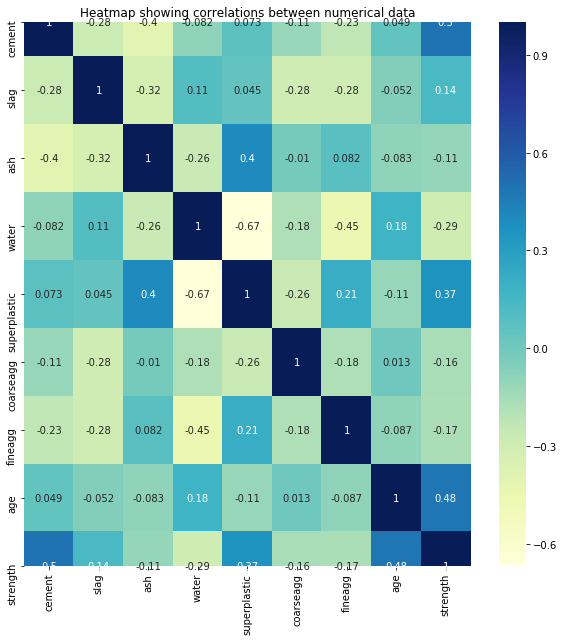

In [37]:
# correlation heatmap
plt.figure(figsize=(10,10))  
sns.heatmap(concrete_raw.corr(),cmap='YlGnBu',annot=True)
plt.title('Heatmap showing correlations between numerical data')

##### Observations:
* 'Superplastic' has positive correlation with multiple attributes
* None of the other attributes have positive colleration with multiple attributes
* 'coarseagg' and 'fineagg' has relatively low correlation with the dependent attribute 'Strength'
* 'Slag' and 'Ash'has least correlation with the dependent attribute 'Strength'
* 'Cement', 'Superplastic' and 'Age' has high correlation with 'Strenght'

### Scaling and Separating the dependent Variable

In [38]:
#Scaling
concrete_raw_z = concrete_raw.apply(zscore)

In [39]:
X = concrete_raw_z.drop(['strength'], axis=1)
y = concrete_raw_z[['strength']]

## Deliverable - 2 ::   Feature Engineering Techniques

## Linear Regression

In [40]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [41]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7580831365203424
The coefficient for slag is 0.5240950800434035
The coefficient for ash is 0.30959694239459595
The coefficient for water is -0.1820552740097221
The coefficient for superplastic is 0.11125211406974735
The coefficient for coarseagg is 0.06918324032398561
The coefficient for fineagg is 0.10541289557730187
The coefficient for age is 0.5499716581789019


##### Observations:
* Superplastic, Age and cement has the most influence on Target variable Strength
* cousesagg and fineagg has very less influence on Target variable Strength

In [43]:
# The intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.011111768308621355


In [44]:
regression_model.score(X_train, y_train)

0.7341900811783

In [45]:
# Model score - R2 or coeff of determinant
accuracy_lm = regression_model.score(X_test, y_test)
accuracy_lm

0.7393213501852648

In [46]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix = pd.DataFrame({'Regressor Model':['Linear Regression'], 'Accuracy': accuracy_lm },index={'1'})
Accuracy_Matrix = Accuracy_Matrix[['Regressor Model', 'Accuracy']]
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321


## 2(b) Polynomial Transformation - Adding interaction terms with a higher degree

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

In [48]:
#Testing R^2
Accuracy_poly = poly_clf.score(X_test2, y_test)
# R^2 improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(721, 8)
(721, 37)


In [49]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix_poly = pd.DataFrame({'Regressor Model':['Linear Regression - Polynomial Transformation'], 'Accuracy': Accuracy_poly },index={'2'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_Matrix_poly])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890


##### Observations:

* Polynomial Features (with only interaction terms) have improved the R Square value 
* However at the cost of increaing the number of variables significantly from 8 to 37
* Perfomance of the model slightly increased when compared to linear model. So a quadratic model will be of better use for us then a simple linear model
* A complex model performs better for the given dataset rather than a linear model. The complexity of model can be set as a quadratic. ie degree = 2 polynomial.

### Adjusted R Squared

In [50]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
185,0.658961,-0.857572,-0.847144,1.015158,-1.070393,0.013910,0.020743,-0.683574,-0.795799
286,0.888723,1.339120,-0.847144,-0.540919,0.690741,-0.602435,-0.209238,1.553726,1.741687


In [51]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -0.011112
cement          0.758083
slag            0.524095
ash             0.309597
water          -0.182055
superplastic    0.111252
coarseagg       0.069183
fineagg         0.105413
age             0.549972
dtype: float64

In [52]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     245.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          4.26e-199
Time:                        19:09:20   Log-Likelihood:                -538.54
No. Observations:                 721   AIC:                             1095.
Df Residuals:                     712   BIC:                             1136.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0111      0.019     -0.579   

##### Observation:
* The low score may be due to the large spread and apparent mix of gaussians
* Need to explore if the data has hidden clusters

##  2(c) K-Means - Explore Gaussians (Presence of Gaussians & Individual Clusters)

In [53]:
#KMeans Clustering
#from distribution we noticed a max of 3 clusters for most of the varibles. Hence let us try in range 1 - 6

cluster_range = range(1, 6)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_raw_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7583.511572
2,3,6369.887403
3,4,5566.091542
4,5,4986.420411


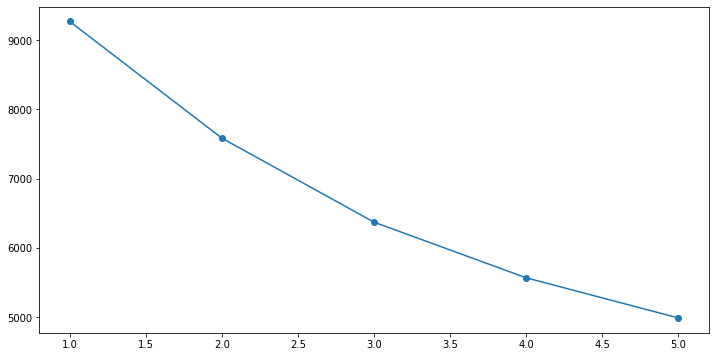

In [54]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

##### Observation:
* The elbow plot confirms our visual analysis that there are likely 3 good clusters

In [55]:
k_means = KMeans(n_clusters = 3)
k_means.fit(concrete_raw_z)
labels = k_means.labels_
# Calculating silhouette_score
silhouette_score(concrete_raw_z,labels)

0.20733546905366967

In [56]:
concrete_raw_z_cluster=concrete_raw_z.copy(deep = True)
concrete_raw_z_cluster["Clus_kmeans3"] = labels
concrete_raw_z_cluster.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Clus_kmeans3
0,-1.339017,1.603837,-0.847144,1.038806,-1.070393,-0.014398,-0.312289,-0.276792,-0.355018,1
1,-1.074790,-0.367612,1.096078,-1.099025,0.812800,1.388141,0.287169,-0.683574,-0.737108,2
2,-0.298384,-0.857572,0.648965,0.277322,-0.111360,-0.206121,1.104041,-0.276792,-0.395144,2
3,-0.145209,0.466016,-0.847144,2.197586,-1.070393,-0.526517,-1.298819,-0.276792,0.600806,1
4,-1.209776,1.271779,-0.847144,0.556375,0.516371,0.958372,-0.963273,-0.276792,-1.049727,1


In [57]:
concrete_raw_z_cluster.Clus_kmeans3.value_counts().sort_index()

0    220
1    429
2    381
Name: Clus_kmeans3, dtype: int64

In [58]:
clust_profile=concrete_raw_z_cluster.groupby('Clus_kmeans3').mean()
clust_profile['freq']=concrete_raw_z_cluster.Clus_kmeans3.value_counts().sort_index()
clust_profile

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,freq
Clus_kmeans3,,,,,,,,,,
0,0.958448,0.488087,-0.405972,-0.866947,1.025055,-0.661010,0.107663,-0.127155,1.121612,220
1,0.064992,0.116792,-0.795831,0.704419,-0.920167,0.246782,-0.265934,0.128161,-0.359692,429
2,-0.626615,-0.413340,1.130512,-0.292565,0.444198,0.103813,0.237270,-0.070885,-0.242643,381


In [59]:
centroids = k_means.cluster_centers_
centroids

array([[ 0.95844835,  0.48808667, -0.40597158, -0.86694651,  1.02505524,
        -0.66101025,  0.10766306, -0.1271546 ,  1.12161221],
       [ 0.064992  ,  0.11679168, -0.79583092,  0.70441857, -0.9201667 ,
         0.24678214, -0.26593382,  0.12816097, -0.35969194],
       [-0.62661471, -0.41334041,  1.13051237, -0.29256518,  0.4441978 ,
         0.10381291,  0.23726964, -0.07088463, -0.24264263]])

In [60]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_raw_z) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.958448,0.488087,-0.405972,-0.866947,1.025055,-0.661010,0.107663,-0.127155,1.121612
1,0.064992,0.116792,-0.795831,0.704419,-0.920167,0.246782,-0.265934,0.128161,-0.359692
2,-0.626615,-0.413340,1.130512,-0.292565,0.444198,0.103813,0.237270,-0.070885,-0.242643


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E309524688>,
      dtype=object)

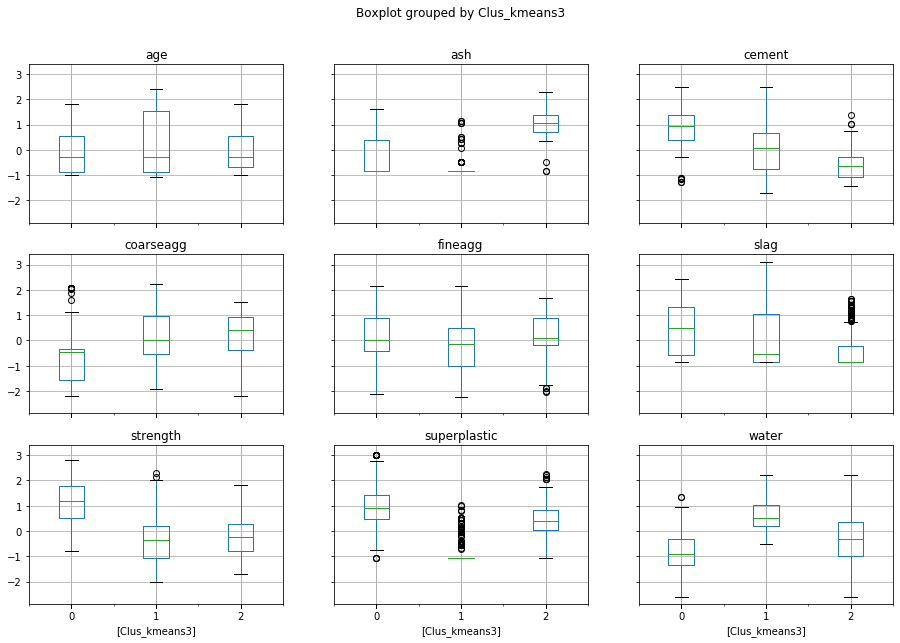

In [61]:

concrete_raw_z_cluster.boxplot(by = 'Clus_kmeans3',  layout=(3,3), figsize=(15, 10))

### Analyse strength vs each of the other independant column

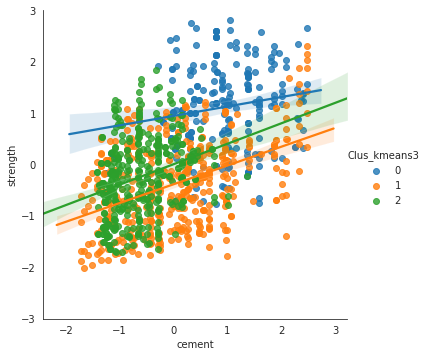

In [62]:
#cement vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('cement','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

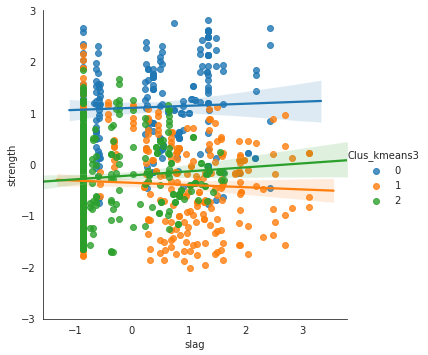

In [63]:
#slag vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('slag','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

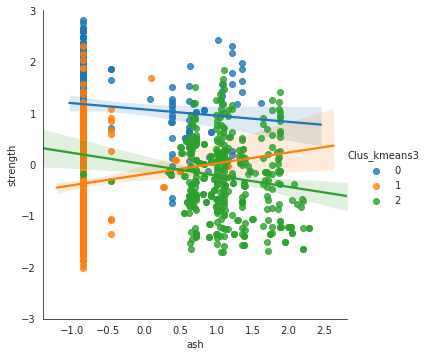

In [64]:
#ash vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('ash','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

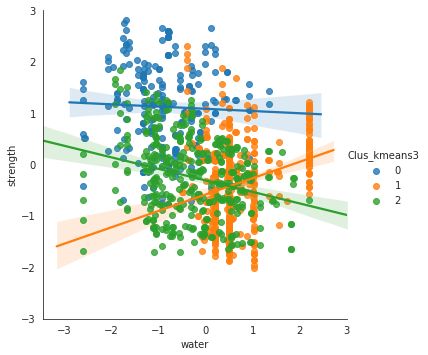

In [65]:
#water vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('water','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

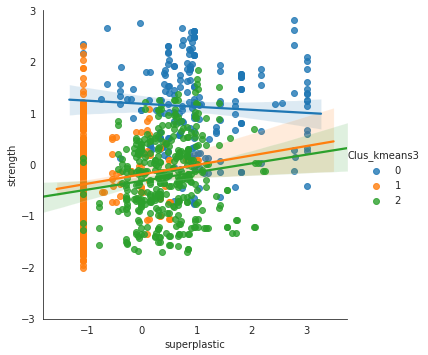

In [66]:
#superplastic vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('superplastic','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

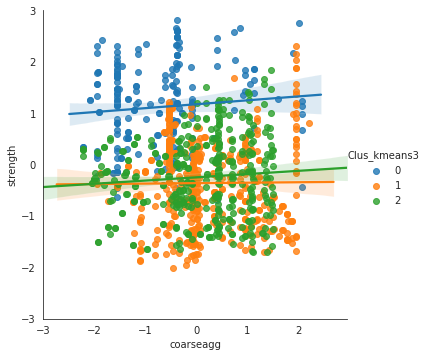

In [67]:
#coarseagg vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('coarseagg','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

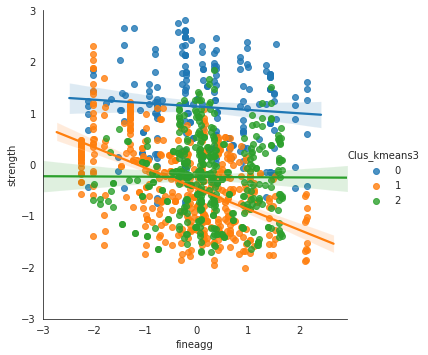

In [68]:
#fineagg vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('fineagg','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

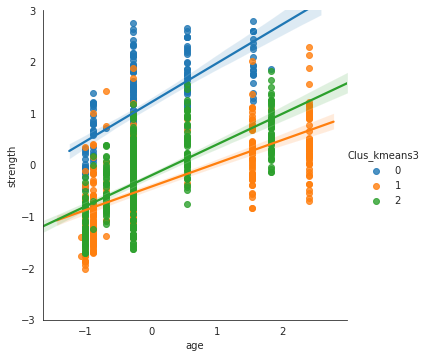

In [69]:
#age vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('age','strength',data=concrete_raw_z_cluster,hue='Clus_kmeans3')
plot.set(ylim = (-3,3))

##### Observations:

* CLaerly from the box plots each group overlaps with other. 
* The same can be clearly derived from the Scatterplot as well that all the groups are overlapping. 
* There is no clear differenciation of the groups or clusters. 
* Hence KMeans or Clustering won't help in this case
* Also Attributes like 'slag','ash', 'coarseagg', 'fineagg' are weak contributes.
* Before proceeding to drop the weak features, validating weak contributors through Ridge, Lasso and Feature Importance using decision trees.

## 2(a) Create composite feature using Principal Components Analysis (PCA)

In [70]:
#covarience matrix of scaled data
covMatrix = np.cov(X,rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
print(covMatrix)

[[ 1.00097182 -0.27567318 -0.39785361 -0.08179919  0.07313521 -0.10945526
  -0.22712896  0.04880104]
 [-0.27567318  1.00097182 -0.32396947  0.10681438  0.04530973 -0.28447347
  -0.28437099 -0.05201993]
 [-0.39785361 -0.32396947  1.00097182 -0.25918954  0.40318139 -0.00997051
   0.08221025 -0.08302168]
 [-0.08179919  0.10681438 -0.25918954  1.00097182 -0.6686933  -0.17920813
  -0.44805761  0.17630894]
 [ 0.07313521  0.04530973  0.40318139 -0.6686933   1.00097182 -0.25930063
   0.21257046 -0.11224322]
 [-0.10945526 -0.28447347 -0.00997051 -0.17920813 -0.25930063  1.00097182
  -0.17540462  0.01295939]
 [-0.22712896 -0.28437099  0.08221025 -0.44805761  0.21257046 -0.17540462
   1.00097182 -0.08726267]
 [ 0.04880104 -0.05201993 -0.08302168  0.17630894 -0.11224322  0.01295939
  -0.08726267  1.00097182]]


In [71]:
#lets intialize and fit pca
pca = PCA(n_components=8)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [72]:
print(pca.explained_variance_) #explained variance of each attributes

[2.22145032 1.416559   1.32675278 1.01957166 0.96773511 0.85749394
 0.1681325  0.03007923]


In [73]:
# The eigen Vectors
print(pca.components_) #principle components

[[ 0.10229627  0.1938169  -0.41525896  0.55419618 -0.52307438  0.03897873
  -0.40531464  0.18163416]
 [-0.16258627  0.69008812 -0.10290246  0.05146653  0.27909278 -0.61831188
  -0.0233752  -0.15283197]
 [ 0.81314828 -0.12209201 -0.42199317 -0.21956669  0.23019271 -0.20521729
  -0.01675854  0.04703173]
 [ 0.03629241  0.27998287 -0.16528671 -0.26443938  0.0245952   0.49979022
  -0.33658936 -0.67775879]
 [ 0.13338335  0.0597423   0.4670617   0.00985354  0.36345744  0.06409962
  -0.71745077  0.33083278]
 [ 0.18823126 -0.38162152  0.34268169  0.39057691 -0.09929839 -0.38944534
  -0.13374555 -0.60789574]
 [ 0.21923269  0.23400302  0.36783395 -0.51177444 -0.67009753 -0.21497639
  -0.04036907  0.05558334]
 [ 0.44641776  0.43468953  0.37509193  0.39688736  0.06256686  0.34967898
   0.4328363   0.00232196]]


In [74]:
print(pca.explained_variance_ratio_) #explained variance of each attribute in percentage

[0.2774117  0.17689796 0.16568308 0.12732272 0.12084944 0.10708268
 0.02099616 0.00375625]


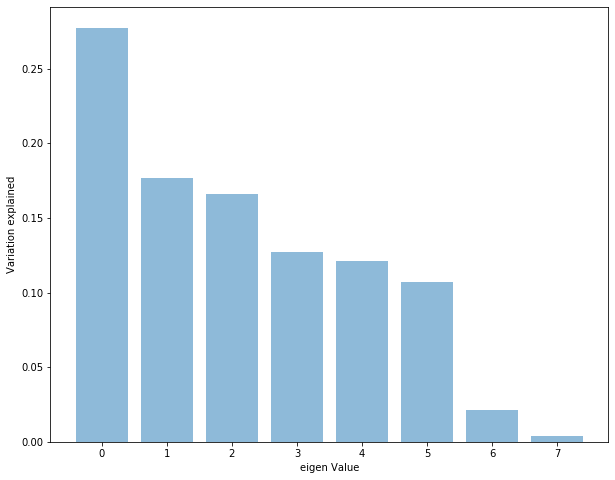

In [75]:
#lets visualize the contribution of variance of each attribute
plt.figure(figsize=(10,8))
plt.bar(list(range(8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

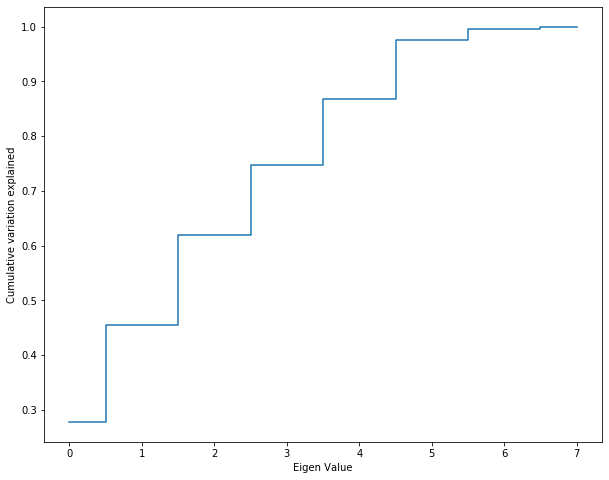

In [76]:
# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(10,8))
plt.step(list(range(8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative variation explained')
plt.xlabel('Eigen Value')
plt.show()

##### Observations:
    
* From the above graphical representation it's clear that 6 Composite Features or Principal Components captures 95% of variance in the data

In [77]:
# Reducing the dimensionality from 8 to 6
pca6 = PCA(n_components=6)
pca6.fit(X)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X)

[[ 0.10229627  0.1938169  -0.41525896  0.55419618 -0.52307438  0.03897873
  -0.40531464  0.18163416]
 [-0.16258627  0.69008812 -0.10290246  0.05146653  0.27909278 -0.61831188
  -0.0233752  -0.15283197]
 [ 0.81314828 -0.12209201 -0.42199317 -0.21956669  0.23019271 -0.20521729
  -0.01675854  0.04703173]
 [ 0.03629241  0.27998287 -0.16528671 -0.26443938  0.0245952   0.49979022
  -0.33658936 -0.67775879]
 [ 0.13338335  0.0597423   0.4670617   0.00985354  0.36345744  0.06409962
  -0.71745077  0.33083278]
 [ 0.18823126 -0.38162152  0.34268169  0.39057691 -0.09929839 -0.38944534
  -0.13374555 -0.60789574]]
[0.2774117  0.17689796 0.16568308 0.12732272 0.12084944 0.10708268]


In [78]:
print(Xpca6.shape)

(1030, 6)


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(Xpca6, y, test_size=0.30, random_state=1)

In [80]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
regression_model.score(X_train, y_train)
# Model score - R2 or coeff of determinant
accuracy_lm = regression_model.score(X_test, y_test)
accuracy_lm

0.69996600384521

##### Observation
* PCA is not able to reduce the number of features much (number of features are reduced from 8 to 6 Princial components)
* In the orginal data as seen in EDA the independent variables do not have significant corelation between each other. 
* Hence there is no inprovement PCA able to bring in this case and will not consider PCA going forward

## Deliverable - 3

## 3(a) Obtain Feature Importance for the individual features

#### Previous Observations:
* From Pair Plot and Correlation Model it was clear 'coarseagg' and 'fineagg' has relatively low correlation with the dependent attribute 'Strength'. 'Slag' and 'Ash'has least correlation with the dependent attribute 'Strength' and 'Cement','Superplastic' and 'Age' has high correlation with 'Strenght'
* From KMeans clustering it was clear 'slag','ash', 'coarseagg', 'fineagg' are weak contributes.

## RIDGE Model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [83]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.75355433  0.51968464  0.30564288 -0.18497927  0.11133688  0.06621805
   0.10158719  0.54958709]]


##### Observation:
* As per Ridge Model most important features are Cement, Slag, Ash, Age

In [84]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7341870450645954
0.7394905667062648


In [85]:
Accuracy_ridge = ridge.score(X_test, y_test)
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix_ridge = pd.DataFrame({'Regressor Model':['Ridge Model'], 'Accuracy': Accuracy_ridge },index={'3'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_Matrix_ridge])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491


## LASSO Model

In [86]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.40512097  0.16165104  0.         -0.12746099  0.18999013 -0.
 -0.          0.40084866]


In [87]:
X_train.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,0.658961,-0.857572,-0.847144,1.015158,-1.070393,0.013910,0.020743,-0.683574
286,0.888723,1.339120,-0.847144,-0.540919,0.690741,-0.602435,-0.209238,1.553726


##### Observations:
* ash, coarseagg & fineagg - are the attributes which are weak predictors of strength

In [88]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6553639182449271
0.6507685565916601


In [89]:
Accuracy_lasso = lasso.score(X_test, y_test)
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix_lasso = pd.DataFrame({'Regressor Model':['Lasso Model'], 'Accuracy': Accuracy_lasso },index={'4'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_Matrix_lasso])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769


## Deliverable -4

## 4(a) Algorithms suitable

## Decision Tree Model

In [90]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [91]:
dTree = DecisionTreeRegressor(random_state=1)
dTree = dTree.fit(X_train, y_train)

In [92]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.349189
slag          0.096917
ash           0.012784
water         0.121430
superplastic  0.018740
coarseagg     0.031282
fineagg       0.035903
age           0.333756


#### Decision Tree Model with All Features present

In [93]:
#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dTree,X, y, cv=kfold)
DT_REG=np.mean(abs(results1))

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_DT = pd.DataFrame({'Regressor Model':['Decision Tree (All Features)'], 'Accuracy': DT_REG},index={'5'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_DT])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769
5,Decision Tree (All Features),0.864073


## 2(a) Dropping 'ash', 'coarseagg' and 'fineagg' from independent variables as these have no significant impact on dependent variable 'strength'

### Features having significant impact on strength (dependent variable) will be used here on ward for finding suitable model in predicting the strength of high performance concrete

In [94]:
X=X.drop(['ash','coarseagg','fineagg'], axis=1)

In [95]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [96]:
dTree = DecisionTreeRegressor(random_state=1)
dTree = dTree.fit(X_train, y_train)

#### Decision Tree Model with Dropped Features (Retained Features = 5)

In [97]:
#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dTree,X, y, cv=kfold)
DT_REG=np.mean(abs(results1))

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_DT = pd.DataFrame({'Regressor Model':['Decision Tree (Dropped Features)'], 'Accuracy': DT_REG},index={'6'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_DT])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769
5,Decision Tree (All Features),0.864073
6,Decision Tree (Dropped Features),0.863951


#### Decision Tree Model (Hyperparameter Tunning)

In [98]:
# Decision Tree Hyperparameters Grid
param_grid = {'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None]}

# Decision Tree Regressor
dTree = DecisionTreeRegressor(random_state = 1)
dt_reg_grid = GridSearchCV(dTree, param_grid, cv = 10, n_jobs = -1, verbose = False, scoring = 'r2')
dt_reg_grid.fit(X_train, y_train)
accuracy_DTree_grid = dt_reg_grid.best_score_
print((accuracy_DTree_grid*100),'%')
dt_reg_grid.best_params_

81.28653586468256 %


{'criterion': 'mse', 'max_depth': 10}

In [99]:
print(dt_reg_grid.best_estimator_)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')


In [100]:
#grid_predictions = dt_reg_grid.predict(X_test1)
accuracy_DT_reg=dt_reg_grid.score(X_test, y_test)
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_DT_Reg = pd.DataFrame({'Regressor Model':['Regularized Decision Tree'], 'Accuracy': accuracy_DT_reg},index={'7'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_DT_Reg])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769
5,Decision Tree (All Features),0.864073
6,Decision Tree (Dropped Features),0.863951
7,Regularized Decision Tree,0.839500


## Random Forest Regressor

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### RandomForest with Hyper Parameter Tuning using GridSearchCV

In [102]:
rf_reg = RandomForestRegressor(n_estimators = 100)
rf_reg = rf_reg.fit(X_train, y_train)

pred_RF = rf_reg.predict(X_test)
accuracy_RF = rf_reg.score(X_test,y_test)

In [103]:
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))

0.9809232526264222
0.9079114625851862


#### Feature Importance

In [104]:
print (pd.DataFrame(rf_reg.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.345968
slag          0.096215
water         0.133212
superplastic  0.074184
age           0.350421


#### K-fold cross validation on Random Forest Regressor model

In [105]:
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(rf_reg,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9150005169381943
Standard Deviation:  0.022791632944562226


In [106]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_RF = pd.DataFrame({'Regressor Model':['Random Forest Regressor'], 'Accuracy': accuracy},index={'8'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_RF])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769
5,Decision Tree (All Features),0.864073
6,Decision Tree (Dropped Features),0.863951
7,Regularized Decision Tree,0.839500
8,Random Forest Regressor,0.915001


## AdaBoost Regressor

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [108]:
abreg = AdaBoostRegressor( n_estimators= 500, learning_rate=0.1, random_state=1)
abreg = abreg.fit(X_train, y_train)

#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(abreg,X, y, cv=kfold)
AB_REG=np.mean(abs(results1))

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_AB = pd.DataFrame({'Regressor Model':['AdaBoost Regressor'], 'Accuracy': AB_REG},index={'9'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_AB])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769
5,Decision Tree (All Features),0.864073
6,Decision Tree (Dropped Features),0.863951
7,Regularized Decision Tree,0.839500
8,Random Forest Regressor,0.915001
9,AdaBoost Regressor,0.779312


## Bagging Regressor

In [109]:
bgreg = BaggingRegressor(n_estimators=500, max_samples= .7, bootstrap=True, oob_score=True, random_state=1)
bgreg = bgreg.fit(X_train, y_train)

#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(bgreg,X, y, cv=kfold)
BAG_REG=np.mean(abs(results1))

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_BAG = pd.DataFrame({'Regressor Model':['Bagging Regressor'], 'Accuracy': BAG_REG},index={'10'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_BAG])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769
5,Decision Tree (All Features),0.864073
6,Decision Tree (Dropped Features),0.863951
7,Regularized Decision Tree,0.839500
8,Random Forest Regressor,0.915001
9,AdaBoost Regressor,0.779312
10,Bagging Regressor,0.910723


## Gradient Boost Regressor

In [110]:
gbreg = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.1, random_state=1)
gbreg = gbreg.fit(X_train, y_train)

#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(gbreg,X, y, cv=kfold)
GB_REG=np.mean(abs(results1))

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_GB = pd.DataFrame({'Regressor Model':['Gradient Boost Regressor'], 'Accuracy': GB_REG},index={'11'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_GB])
Accuracy_Matrix

,Regressor Model,Accuracy
1,Linear Regression,0.739321
2,Linear Regression - Polynomial Transformation,0.775890
3,Ridge Model,0.739491
4,Lasso Model,0.650769
5,Decision Tree (All Features),0.864073
6,Decision Tree (Dropped Features),0.863951
7,Regularized Decision Tree,0.839500
8,Random Forest Regressor,0.915001
9,AdaBoost Regressor,0.779312
10,Bagging Regressor,0.910723


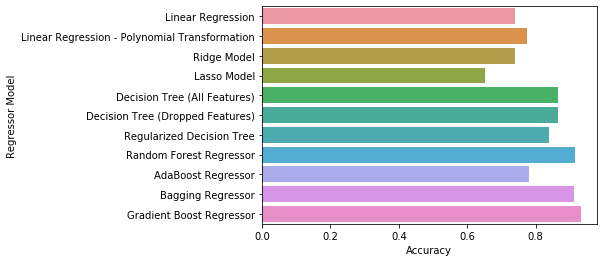

In [111]:
ax = sns.barplot(y="Regressor Model", x="Accuracy", data=Accuracy_Matrix,  ci=200)

##### Observation:
* From the above model performance score this is clear that Random Forest, Bagging , Gradient Boosting are perfoming better than others
* From here onward considering  Random Forest, Bagging , Gradient Boosting we will hypertune the model to to squeeze that extra performance out of the models without making it overfit or underfit

## 4(b) Model HyperTuning 

## 4(c) Check performance range at 95% confidence level

#### Model Tuning of the below chosen models:
* Random Forest Regressor  
* Bagging Regressor
* Gradient Boosting Regressor

### Random Forest Regressor - Model Hypertuned

In [112]:
# Model HyperTuning - Random Forest Regressor 
est = [200,210, 220, 250,]
leaf_size = range(1,4)
split_size = [2, 3, 4, 5]

params = dict(n_estimators=est,min_samples_leaf=leaf_size,min_samples_split=split_size)
model = GridSearchCV(RandomForestRegressor(), param_grid=params,cv = 3, verbose=1)
model.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   57.8s finished


Best Hyper Parameters:
 {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 220}


In [113]:
RF = RandomForestRegressor(n_estimators = 220,min_samples_leaf=1, min_samples_split=2)
RF.fit(X_train, y_train)

#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(RF,X, y, cv=kfold)

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix = pd.DataFrame({'Regressor Model':['Random Forest'], 'Accuracy':results.mean()*100.0, 'std(+/-)':results.std()*100.0},index={'1'})
Accuracy_Matrix = Accuracy_Matrix[['Regressor Model', 'Accuracy', 'std(+/-)']]
Accuracy_Matrix

,Regressor Model,Accuracy,std(+/-)
1,Random Forest,91.520732,2.447261


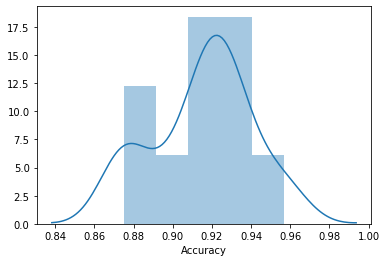

95.0 confidence interval 87.5% and 95.3%


In [114]:
sns.distplot(results,kde=True,bins=5)
plt.xlabel("Accuracy")
plt.show()

# confidence intervals for 95% confidence
alpha = 0.95 

p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(results, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))


print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Bagging Regressor - Model Hypertuned

In [115]:
est = [10,150,200,500,1000]
max_samples= [.2, .4, .7, 1]

params = dict(n_estimators=est,max_samples=max_samples)
model = GridSearchCV(BaggingRegressor(), param_grid=params, verbose=1)
model.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   31.0s finished


Best Hyper Parameters:
 {'max_samples': 0.7, 'n_estimators': 200}


In [116]:
bgreg = BaggingRegressor(n_estimators=200, max_samples= 0.7, bootstrap=True, oob_score=True, random_state=1)
bgreg = bgreg.fit(X_train, y_train)

#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(bgreg,X, y, cv=kfold)

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_BAG = pd.DataFrame({'Regressor Model':['Bagging Regressor'], 'Accuracy':results.mean()*100.0, 'std(+/-)':results.std()*100.0},index={'2'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_BAG])
Accuracy_Matrix

,Regressor Model,Accuracy,std(+/-)
1,Random Forest,91.520732,2.447261
2,Bagging Regressor,91.032901,2.269591


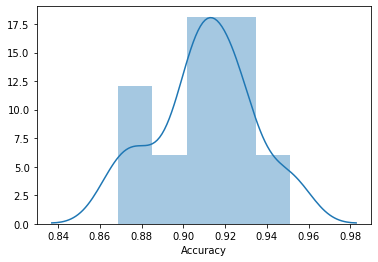

95.0 confidence interval 87.1% and 94.7%


In [117]:
sns.distplot(results,kde=True,bins=5)
plt.xlabel("Accuracy")
plt.show()

# confidence intervals for 95% confidence
alpha = 0.95 

p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(results, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))


print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### Gradient Boost Regressor - Model Hypertuned

In [118]:
est = [10,150,200,500,1000]
leaf_size = range(1,4)
criterion = ['mse', 'friedman_mse']
split_size = [2, 3, 4]

params = dict(n_estimators=est,min_samples_leaf=leaf_size,min_samples_split=split_size, criterion=criterion)
model = GridSearchCV(GradientBoostingRegressor(), param_grid=params, verbose=1)
model.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   42.4s finished


Best Hyper Parameters:
 {'criterion': 'friedman_mse', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}


In [119]:
gbreg = GradientBoostingRegressor(criterion = 'friedman_mse', min_samples_leaf=1,min_samples_split=4,n_estimators=1000)
gbreg.fit(X_train,y_train)

#K-Fold Cross Validation
num_folds = 10
seed = 1
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(gbreg,X, y, cv=kfold)

#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_GRADB = pd.DataFrame({'Regressor Model':['Gadient Boosting'], 'Accuracy':results.mean()*100.0, 'std(+/-)':results.std()*100.0},index={'3'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_GRADB])
Accuracy_Matrix

,Regressor Model,Accuracy,std(+/-)
1,Random Forest,91.520732,2.447261
2,Bagging Regressor,91.032901,2.269591
3,Gadient Boosting,93.721862,1.889245


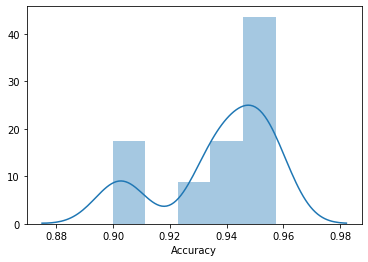

95.0 confidence interval 90.1% and 95.7%


In [120]:
sns.distplot(results,kde=True,bins=5)
plt.xlabel("Accuracy")
plt.show()

# confidence intervals for 95% confidence
alpha = 0.95 

p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(results, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))


print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Conclusion

* The data set as seen in EDA the independent variables do not have significant corelation between each other. 
* PCA in this case is not able to reduce the number of features much (number of features are reduced from 8 to 6 Princial components). Hence there is no inprovement PCA able to bring in this case and therefore PCA is not considered in this case.
* From KMeans it was clear that clusters are overlaping with other. There is no clear differenciation of the groups or clusters. Hence KMeans or Clustering was not considered in this case
* Out of 8 given features from the EDA (Bi-Variate and Pair Plot) and Feature Engineering (Ridge, Lasso, Deacision Tree Feature Importance) it as clear that 'ash', 'coarseagg' and 'fineagg' from independent variables do not hold significant impact on dependent variable 'strength'
* From the different regressor models the models which were performing very close are Random Forest, Bagging , Gradient Boosting
* Finally after Hypertuning of parameters and looing at the variation of the paerformance it is clear that Gradient Boosting Regressor model is performing best 
* Gradient Boosting Regressor model is performing with a accuracy of 93.7% and at 95% confidence interval the Gradient Boosting Regressor model will have a variance from 90.1% to 95.7% of accuracy

### Gradient Boosting Regressor model is performing best in this case for identifying strength of high performance concrete
### Gradient Boosting Regressor model accuracy is 93.7% in this case and at 95% confidence interval the Gradient Boosting Regressor model will have a variance from 90.1% to 95.7% of accuracy

### Thank you